# **Launch Sites Locations Analysis with Folium**


Estimated time needed: **40** minutes


The launch success rate may depend on many factors such as payload mass, orbit type, and so on. It may also depend on the location and proximities of a launch site, i.e., the initial position of rocket trajectories. Finding an optimal location for building a launch site certainly involves many factors and hopefully we could discover some of the factors by analyzing the existing launch site locations.


In the previous exploratory data analysis labs, you have visualized the SpaceX launch dataset using `matplotlib` and `seaborn` and discovered some preliminary correlations between the launch site and success rates. In this lab, you will be performing more interactive visual analytics using `Folium`.


## Objectives


This lab contains the following tasks:
- **TASK 1:** Mark all launch sites on a map
- **TASK 2:** Mark the success/failed launches for each site on the map
- **TASK 3:** Calculate the distances between a launch site to its proximities

After completed the above tasks, you should be able to find some geographical patterns about launch sites.


Let's first import required Python packages for this lab:


In [1]:
import folium
import wget
import pandas as pd

In [2]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

If you need to refresh your memory about folium, you may download and refer to this previous folium lab:


[Generating Maps with Python](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/DV0101EN-3-5-1-Generating-Maps-in-Python-py-v2.0.ipynb)


## Task 1: Mark all launch sites on a map


First, let's try to add each site's location on a map using site's latitude and longitude coordinates


The following dataset with the name `spacex_launch_geo.csv` is an augmented dataset with latitude and longitude added for each site. 


In [7]:
# Download and read the `spacex_launch_geo.csv`
spacex_csv_file = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv')
spacex_df = pd.read_csv(spacex_csv_file)

URLError: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>

In [8]:
spacex_df = pd.read_csv('spacex_launch_geo.csv')
spacex_df['Payload Mass (kg)'].sum()

207012.3

In [9]:
df_nasa = spacex_df[spacex_df['Customer'].str.contains('NASA')]
df_nasa['Payload Mass (kg)'].sum()

39157.0

Now, you can take a look at what are the coordinates for each site.


In [10]:
# Filter to only relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
# Group them by "first()" occurence, since there is no need to average them or so. The Lat and Lon are the same values for each row of the same launch site
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
print(launch_sites_df.shape)
launch_sites_df

(4, 3)


,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


Above coordinates are just plain numbers that can not give you any intuitive insights about where are those launch sites. If you are very good at geography, you can interpret those numbers directly in your mind. If not, that's fine too. Let's visualize those locations by pinning them on a map.


We **first** need to create a folium `Map` object, with an initial center location to be NASA Johnson Space Center at Houston, Texas.


In [11]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
print(type(nasa_coordinate))
site_map = folium.Map(location=nasa_coordinate, zoom_start=12)

<class 'list'>


We could use `folium.Circle` to add a highlighted circle area with a text label on a specific coordinate. For example, 


In [12]:
# help(folium.Circle)

In [13]:
# Create an orange circle at NASA Johnson Space Center's coordinate with a popup label showing its name
# colored orange (hex color code #d35400), with the circle filled with the color blue
# Add a popup so when you click on the circle marker on the map, a popup with this text will appear.

circle = folium.Circle(nasa_coordinate, radius=1000, color='#4169E1', fill=False).add_child(folium.Popup('NASA Johnson Space Center'))

# Add a marker for text label of NASA JSC

marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        # set icon size 20,20 pixel
        icon_size=(20,20),
        
        # icon_anchor specifies the position
        # The values for the anchor specified as fractions (decimals less than 1) of the icon's width and height
        # (0, 0) means that the anchor point is at the top-left corner of the icon.
        # (0.5, 0.5) would mean the anchor point is at the center of the icon.
        # (1, 1) would mean the anchor point is at the bottom-right corner of the icon.
        
        icon_anchor=(0,0),
        # Use HTML parsing for the marker
        # When parse_html is set to True, it indicates that the content of the popup should be treated as HTML and parsed accordingly.
        # For example, if you have text with HTML tags like <b>, <i>, or <a>, parse_html=True will ensure these tags are interpreted correctly
        # and displayed as formatted text or links.
        # One would need HTML parsing here for Customization and Styling (HTML allows you to fully customize the appearance,
        #  font size/color of the marker icon)

        # %s is a placeholder for a string
        
        html='<div style="font-size: 12; color:#4169E1;"><b>%s</b></div>' % 'NASA JSC',
        )
    )


In [15]:
# Now add these markers (Circle and Marker named before) to the map
site_map.add_child(circle)
site_map.add_child(marker)

and you should find a small circle near the city of Houston and you can zoom-in to see a larger circle. 


Now, let's add a circle for each launch site in data frame `launch_sites`


_TODO:_  Create and add `folium.Circle` and `folium.Marker` for each launch site on the site map


An example of folium.Circle:


`folium.Circle(coordinate, radius=1000, color='#000000', fill=True).add_child(folium.Popup(...))`


An example of folium.Marker:


`folium.map.Marker(coordinate, icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0), html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'label', ))`


In [16]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]

# Create the map
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)


for i, row in launch_sites_df.iterrows():
    # Get coordinates of points + their Labels
    coordinates = [row['Lat'], row['Long']]
    site_name = row['Launch Site']
    
    circle = folium.Circle(location=coordinates, radius=1000, color='#4169E1', fill=True).add_child(folium.Popup(site_name))
    Marker = folium.map.Marker(location= coordinates, icon = DivIcon(icon_size= (20,20), icon_anchor=(0,0), html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % site_name, ))
    site_map.add_child(circle)
    site_map.add_child(Marker)
    
# Display the map
site_map
    

The generated map with marked launch sites should look similar to the following:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_markers.png">
</center>


Now, you can explore the map by zoom-in/out the marked areas
, and try to answer the following questions:
- Are all launch sites in proximity to the Equator line?
- Are all launch sites in very close proximity to the coast?

Also please try to explain your findings.


In [17]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]

# Create the map
site_map = folium.Map(location=nasa_coordinate, zoom_start=4)


for i, row in launch_sites_df.iterrows():
    # Get coordinates of points + their Labels
    coordinates = [row['Lat'], row['Long']]
    site_name = row['Launch Site']
    
    circle = folium.Circle(location=coordinates, radius=1000, color='#4169E1', fill=True).add_child(folium.Popup(site_name))
    Marker = folium.map.Marker(location= coordinates, icon = DivIcon(icon_size= (20,20), icon_anchor=(0,0), html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % site_name, ))
    site_map.add_child(circle)
    site_map.add_child(Marker)
    
# Display the map
site_map


# You can add the equator line to your Folium map by creating a polyline that represents the equator's path and adding it to the map. 
# The equator is a circle around the Earth at 0 degrees latitude. 

# Create coordinates for the equator line
equator_coordinates = [(0, lon) for lon in range(-180, 181)]

# Create coordinates for the Greenwich line
greenwich_coordinates = [(lat, 0) for lat in range(-90, 91)]


# Create a polyline for the equator line
equator_line = folium.PolyLine(
    locations = equator_coordinates,
    color='green',  # You can choose a color for the equator line
    weight=2,        # Line weight/thickness
)

# Create a polyline for the Greenwich line
Greenwich_line = folium.PolyLine(
    locations = greenwich_coordinates,
    color='green',  # You can choose a color for the equator line
    weight=2,        # Line weight/thickness
)


# Add the Equator and Greenwich lines to the map and return the map
site_map.add_child(equator_line)
site_map.add_child(Greenwich_line)


Site locations and the Equator

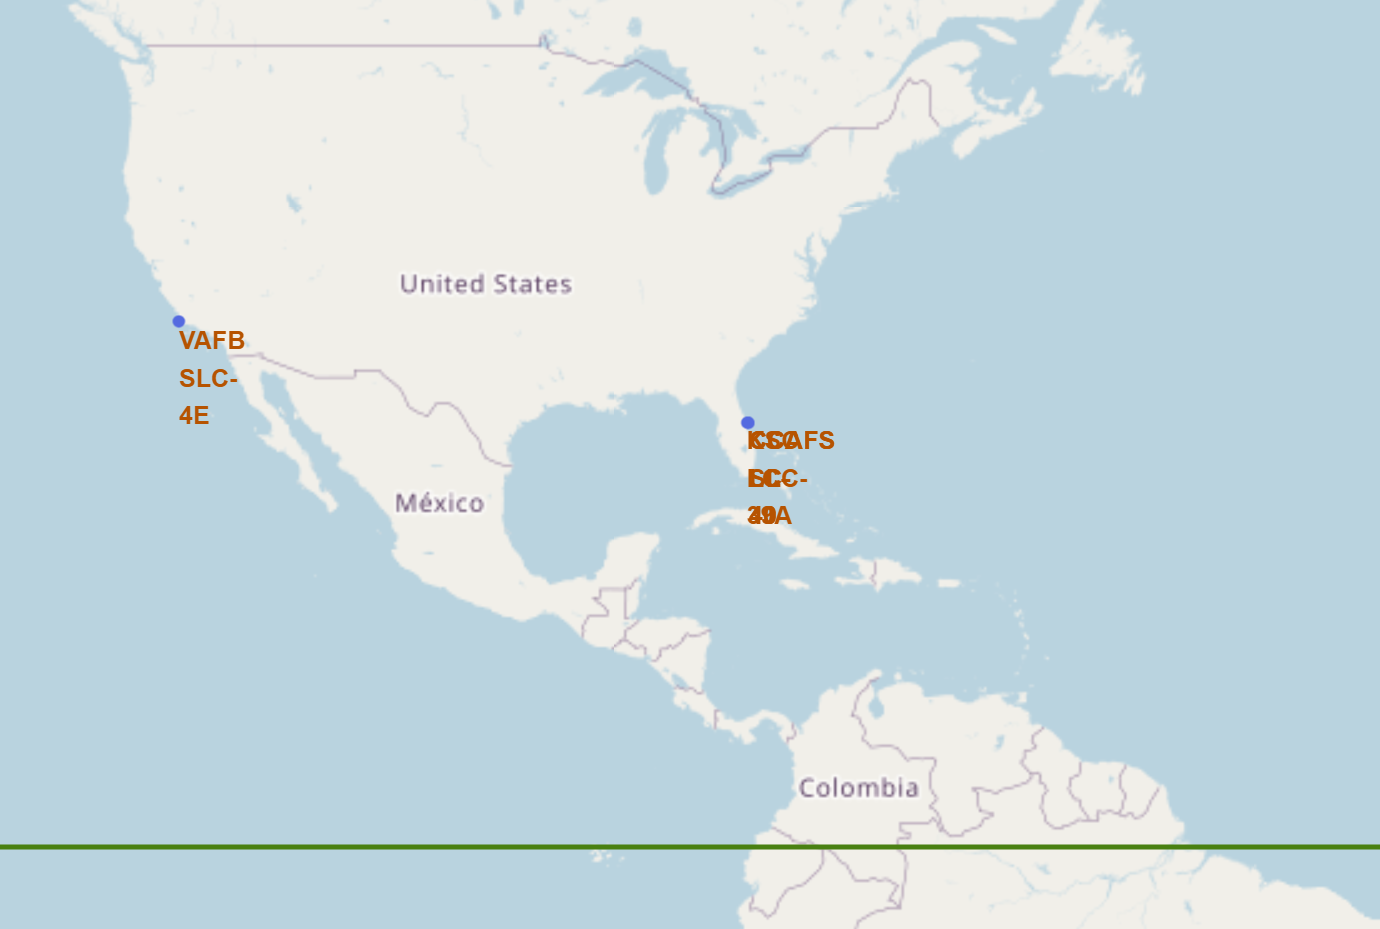

# Task 2: Mark the success/failed launches for each site on the map


Next, let's try to enhance the map by adding the launch outcomes for each site, and see which sites have high success rates.
Recall that the dataframe spacex_df has detailed launch records, and the `class` column indicates if this launch was successful or not

In [18]:
spacex_df.tail(10)

,Launch Site,Lat,Long,class
46,KSC LC-39A,28.573255,-80.646895,1
47,KSC LC-39A,28.573255,-80.646895,1
48,KSC LC-39A,28.573255,-80.646895,1
49,CCAFS SLC-40,28.563197,-80.576820,1
50,CCAFS SLC-40,28.563197,-80.576820,1
51,CCAFS SLC-40,28.563197,-80.576820,0
52,CCAFS SLC-40,28.563197,-80.576820,0
53,CCAFS SLC-40,28.563197,-80.576820,0
54,CCAFS SLC-40,28.563197,-80.576820,1
55,CCAFS SLC-40,28.563197,-80.576820,0


Next, let's create markers for all launch records. 
If a launch was successful `(class=1)`, then we use a green marker and if a launch failed, we use a red marker `(class=0)`


Note that a launch only happens in one of the four launch sites, which means many launch records will have the exact same coordinate. Marker clusters can be a good way to simplify a map containing many markers having the same coordinate.


Let's first create a `MarkerCluster` object


In [19]:
#  A marker cluster is a feature that allows you to group multiple markers that are close to each other on the map into a single cluster marker.
# This is particularly useful when you have a large number of markers on your map, and displaying them all individually can make the map cluttered and hard to read.
# When you use marker clustering in Folium, the library automatically groups nearby markers based on their proximity and zoom level.
# As you zoom in on the map, the clusters can dynamically break apart into individual markers, making it easier to explore the map at different levels of detail.
marker_cluster = MarkerCluster()

_TODO:_ Create a new column in `launch_sites` dataframe called `marker_color` to store the marker colors based on the `class` value


In [20]:
# Apply a function to assign a color to launch outcome based on the `class` column
# If class=1, marker_color value will be green
# If class=0, marker_color value will be red

def assign_marker_color(launch_outcome):
    if launch_outcome == 1:
        return "green"
    else:
        return "red"

# .apply is used to apply a function to each element or row of a specific column and create a new column based on the results of that function.

spacex_df['marker_color'] = spacex_df['class'].apply(assign_marker_color)
spacex_df.tail(10)

,Launch Site,Lat,Long,class,marker_color
46,KSC LC-39A,28.573255,-80.646895,1,green
47,KSC LC-39A,28.573255,-80.646895,1,green
48,KSC LC-39A,28.573255,-80.646895,1,green
49,CCAFS SLC-40,28.563197,-80.576820,1,green
50,CCAFS SLC-40,28.563197,-80.576820,1,green
51,CCAFS SLC-40,28.563197,-80.576820,0,red
52,CCAFS SLC-40,28.563197,-80.576820,0,red
53,CCAFS SLC-40,28.563197,-80.576820,0,red
54,CCAFS SLC-40,28.563197,-80.576820,1,green
55,CCAFS SLC-40,28.563197,-80.576820,0,red


_TODO:_ For each launch result in `spacex_df` data frame, add a `folium.Marker` to `marker_cluster`


In [21]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]

# Create the map
site_map = folium.Map(location=nasa_coordinate, zoom_start=6)

# Add a marker cluster for each row in spacex_df data frame
for index, record in spacex_df.iterrows():
    # Create a Marker object with its coordinates and icon properties
    marker = folium.Marker(
        location=[record['Lat'], record['Long']],  # Use the latitude and longitude columns
        icon=folium.Icon(color='white', icon_color=record['marker_color'])  # Set the icon color based on 'marker_color'
    )
    
    # Add the marker to the MarkerCluster
    marker_cluster.add_child(marker)

# Add the MarkerCluster to the site_map
site_map.add_child(marker_cluster)

# Add a marker for each row in launch_sites_df data frame
for index, row in launch_sites_df.iterrows():
    # Get the coordinates and label from the DataFrame
    lat = row['Lat']
    lon = row['Long']
    label = row['Launch Site']
    
    # Create a marker for each point
    marker = folium.Marker(
        location=[lat, lon],
        icon=DivIcon(
            icon_size=(20, 20),
            icon_anchor=(0, 0),
            html='<div style="font-size: 12; color: #d35400;"><b>%s</b></div>' % label
        )
    )
    
    # Add the marker to the map
    marker.add_to(site_map)

# Display the map
site_map


Below is what you should be able to see

The downloaded script (as downloaded) shows that there must be many points around the cluster. To see them as cluster, you must click on the point cluster first

<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_marker_cluster.png">
</center>


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_marker_cluster_zoomed.png">
</center>


From the color-labeled markers in marker clusters, you should be able to easily identify which launch sites have relatively high success rates.


# TASK 3: Calculate the distances between a launch site to its proximities


Next, we need to explore and analyze the proximities of launch sites.


Let's first add a `MousePosition` on the map to get coordinate for a mouse over a point on the map. As such, while you are exploring the map, you can easily find the coordinates of any points of interests (such as railway)


In [22]:
# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
# this will be displayed based on where you position the lat and lon

formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    # Display the coordinates on the topright of the map
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

Now zoom in to a launch site and explore its proximity to see if you can easily find any railway, highway, coastline, etc. Move your mouse to these points and mark down their coordinates (shown on the top-left) in order to calculate (using the following equation) the distance to the launch site.

You can calculate the distance between two points on the map based on their `Lat` and `Long` values using the following method (based on the Haversine method)

The **Haversine formula** is commonly used in **geospatial calculations** and is based on trigonometric principles. It calculates the distance between two points on the Earth's surface based on their latitude and longitude.

In [23]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0
    
    # Convert values to radians since trigonometric functions usually work better in radians than degrees
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    # a represents the square of half the chord length between the two points.
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    
    # c is the central angle between the two points on the sphere
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    # This formula computes the distance based on the radius of the Earth and the central angle c between the two points
    distance = R * c
    return distance

_TODO:_ Mark down a point on the closest coastline using MousePosition and calculate the distance between the coastline point and the launch site.


In [24]:
# These are the coordinates of the closest coastline I found on the east island
coastal_lat = 28.65641
coastal_lon = -80.63536

launch_site_lat = launch_sites_df.Lat # note this is a series (not dataframe)
launch_site_lon = launch_sites_df.Long # note this is a series (not dataframe)

distances = []
for lat, lon in zip(launch_site_lat, launch_site_lon):
    # use zip to do iterate through both series in parallel
    distance = calculate_distance(lat, lon, coastal_lat, coastal_lon)
    distances.append(distance)
    print(f"Distance: {distances} km")
    
print(distances)

Distance: [11.901761748096385] km
Distance: [11.901761748096385, 11.839472585757825] km
Distance: [11.901761748096385, 11.839472585757825, 9.317693745156438] km
Distance: [11.901761748096385, 11.839472585757825, 9.317693745156438, 3818.078352159479] km
[11.901761748096385, 11.839472585757825, 9.317693745156438, 3818.078352159479]


_TODO:_ After obtaining the value of the distance, create a `folium.Marker` to show a text of the distance value

_TODO:_ Draw a `PolyLine` between a launch site to the selected coastline point


## Method 1 to add polylines

In [26]:
# Create a new map
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map1 = folium.Map(location=nasa_coordinate, zoom_start=6)

# Create a Polyline for the distances
# Points
coastal_lat = 28.65641
coastal_lon = -80.63536
launch_site_lat = launch_sites_df.Lat # note this is a series (not dataframe)
launch_site_lon = launch_sites_df.Long # note this is a series (not dataframe)

# Pair the points
point_pairs = []
for lat, lon in zip(launch_site_lat, launch_site_lon):
    # use zip to do iterate through both series in parallel
    point_pair = [(lat, lon), (coastal_lat, coastal_lon)]
    point_pairs.append(point_pair)
    print(f"Line Points: {point_pairs}")

print(point_pair)
print(point_pairs)

#Create a polyline for each line
for i in point_pairs:
    Line = folium.PolyLine(
        locations = i,
        color='green',
        weight=2,       
    )
    Line.add_to(site_map1)

# Add Markers for text of the Distances
for index, row in launch_sites_df.iterrows():
    site_name = row['Launch Site']
    lat = row['Lat']
    lon = row['Long']
    
    # Access the distance for the current site using the index
    distance = distances[index]
    
    distance_marker = folium.Marker(
        location=[lat, lon],
        icon=DivIcon(
            icon_size=(30, 30),
            icon_anchor=(1, 1),
            html='<div style="font-size: 20px; color:#d35400;"><b>{:.2f} KM</b></div>'.format(int(distance))
        ))
    
    distance_marker.add_to(site_map1)  # Add the marker to your Folium map 'site_map1'

site_map1

Line Points: [[(28.56230197, -80.57735648), (28.65641, -80.63536)]]
Line Points: [[(28.56230197, -80.57735648), (28.65641, -80.63536)], [(28.56319718, -80.57682003), (28.65641, -80.63536)]]
Line Points: [[(28.56230197, -80.57735648), (28.65641, -80.63536)], [(28.56319718, -80.57682003), (28.65641, -80.63536)], [(28.57325457, -80.64689529), (28.65641, -80.63536)]]
Line Points: [[(28.56230197, -80.57735648), (28.65641, -80.63536)], [(28.56319718, -80.57682003), (28.65641, -80.63536)], [(28.57325457, -80.64689529), (28.65641, -80.63536)], [(34.63283416, -120.6107455), (28.65641, -80.63536)]]
[(34.63283416, -120.6107455), (28.65641, -80.63536)]
[[(28.56230197, -80.57735648), (28.65641, -80.63536)], [(28.56319718, -80.57682003), (28.65641, -80.63536)], [(28.57325457, -80.64689529), (28.65641, -80.63536)], [(34.63283416, -120.6107455), (28.65641, -80.63536)]]


Your updated map with distance line should look like the following screenshot:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_marker_distance.png">
</center>


_TODO:_ Similarly, you can draw a line betwee a launch site to its closest city, railway, highway, etc. You need to use `MousePosition` to find the their coordinates on the map first


A railway map symbol may look like this:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/railway.png">
</center>


A highway map symbol may look like this:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/highway.png">
</center>


A city map symbol may look like this:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/city.png">
</center>


## Method 2 to add polylines

In [27]:
# Create a marker with distance to a closest city, railway, highway, etc.
# Draw a line between the marker to the launch site
 
coordinates=[[28.65641, -80.63536],[28.65641 ,-80.63536]]

lines=folium.PolyLine(locations=coordinates, weight=1)
site_map1.add_child(lines)

distance_marker = folium.Marker(
    coordinates[0],
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(calculate_distance(28.52361, -80.64857,28.573255 ,-80.646895)),
    )
)
site_map1.add_child(distance_marker)


After you plot distance lines to the proximities, you can answer the following questions easily:
Also please try to explain your findings.

**- Are launch sites in close proximity to railways?**
They all are far from railways

**- Are launch sites in close proximity to highways?**
They ones east in Florida are close to highways,  
The one easternmost is close to Samuel C Phillips Parkway, Titan III Road
The other right west of that, close to Kenedy-Parkway North

The one west in California isn't close to any major highway

**- Are launch sites in close proximity to coastline?**
Yes, 2 launch sites in Florida, 9 and 11 km from Atlantic coastline and 1 in California similar distance from Pacific coast  

**- Do launch sites keep certain distance away from cities?**
Yes, all 3 of them are located away from any major city to avoid having their launches distrupt to dense urban centers